#### Import Libraries

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Import Data

m3 consists of unique bill-summary pairs in which there is at least one summary provided.

In [3]:
m3 = pd.read_pickle('data/matched3.pkl')

In [29]:
len(m3)

5383

In [31]:
m3.head()

,bill-type,billInfo,body.section,file-name,fileName,legis-type,section,sentence,sentence0,sentence1,...,summary1,summary2,summary3,summary4,word,word0,word1,word2,word3,word4
0,bill,S 367,1. Short title Probation Officer Protection Ac...,US_Bill_Text_115_S367_IS.xml,104657.140052642395904.4912.xml,A BILL,6,9,1.0,NaN,...,NaN,NaN,NaN,NaN,194,55.0,NaN,NaN,NaN,NaN
1,bill,S 363,1. Short title North Country National Scenic T...,US_Bill_Text_115_S363_IS.xml,104657.140052642395904.5351.xml,A BILL,3,7,1.0,NaN,...,NaN,NaN,NaN,NaN,96,45.0,NaN,NaN,NaN,NaN
2,resolution,HRES 83,1. Amounts for Committee Expenses For the expe...,US_Bill_Text_115_HRES83_IH.xml,104657.140052642395904.5736.xml,RESOLUTION,3,8,1.0,NaN,...,NaN,NaN,NaN,NaN,185,14.0,NaN,NaN,NaN,NaN
3,resolution,SRES 59,That the Senate— (1) supports the designation ...,US_Bill_Text_115_SRES59_IS.xml,104657.140052642395904.9638.xml,RESOLUTION,3,1,2.0,NaN,...,NaN,NaN,NaN,NaN,34,28.0,NaN,NaN,NaN,NaN
4,bill,S 387,1. Short title Consumer Financial Protection B...,US_Bill_Text_115_S387_IS.xml,104657.140052642395904.9654.xml,A BILL,10,6,2.0,NaN,...,NaN,NaN,NaN,NaN,214,61.0,NaN,NaN,NaN,NaN


#### Filter Data

We want to filter based on bill type - only including bills (not acts or resolutions).

In [32]:
m3['legis-type'].value_counts()

A BILL                   3814
RESOLUTION                776
AN ACT                    436
JOINT RESOLUTION          235
CONCURRENT RESOLUTION     118
Name: legis-type, dtype: int64

In [4]:
filtered = m3[m3['legis-type'] == 'A BILL']

In [13]:
sentence_lengths = [filtered.iloc[i]['sentence0'] for i in range(len(filtered))] + \
                    [filtered.iloc[i]['sentence1'] for i in range(len(filtered))] + \
                    [filtered.iloc[i]['sentence2'] for i in range(len(filtered))] + \
                    [filtered.iloc[i]['sentence3'] for i in range(len(filtered))] + \
                    [filtered.iloc[i]['sentence4'] for i in range(len(filtered))]

In [18]:
sentence_lengths = [i for i in sentence_lengths if np.isnan(i) == False]

In [31]:
print(np.mean(sentence_lengths))
print(np.std(sentence_lengths))

4.08173200102
12.425158244


In [28]:
sorted(sentence_lengths)[-20:]

[27.0,
 30.0,
 33.0,
 36.0,
 47.0,
 63.0,
 70.0,
 101.0,
 130.0,
 130.0,
 170.0,
 186.0,
 197.0,
 205.0,
 245.0,
 245.0,
 245.0,
 254.0,
 257.0,
 287.0]

(array([  2.92600000e+03,   6.57000000e+02,   2.37000000e+02,
          4.30000000e+01,   1.30000000e+01,   5.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([  1.  ,   4.45,   7.9 ,  11.35,  14.8 ,  18.25,  21.7 ,  25.15,
         28.6 ,  32.05,  35.5 ,  38.95,  42.4 ,  45.85,  49.3 ,  52.75,
         56.2 ,  59.65,  63.1 ,  66.55,  70.  ]),
 <a list of 20 Patch objects>)

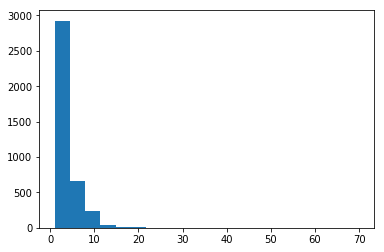

In [30]:
plt.hist([i for i in sentence_lengths if i<100], bins=20)

In [35]:
filtered.to_pickle('filtered_all.pkl')

#### Split into Train-Dev-Test

We are doing an 80-10-10 split. However, we want to ensure that the bills with at least two summaries are in the test data so we'll do a bit of a workaround to get there.

There are 3814 total bills in the filtered data. Therefore, we want 381 in the dev set and 381 in the test set.

In [37]:
len(filtered[~filtered.summary1.isnull()])

85

There are 85 bills with two or more summaries so those will all go in the test set.

In [38]:
test_data1 = filtered[~filtered.summary1.isnull()]
others_temp = filtered[filtered.summary1.isnull()]

Now let's get 296 more for the test set and then 381 for the dev set.

In [43]:
train_dev_temp, test_data2 = train_test_split(others_temp, test_size=296, random_state=42)
train_data, dev_data = train_test_split(train_dev_temp, test_size=381, random_state=42)

In [44]:
test_data = pd.concat([test_data1, test_data2])

In [45]:
print(len(train_data), len(dev_data), len(test_data))

3052 381 381


Pickle!

In [47]:
train_data.to_pickle('data/train.pkl')
dev_data.to_pickle('data/dev.pkl')
test_data.to_pickle('data/test.pkl')